<a href="https://colab.research.google.com/github/nyp-sit/it3103/blob/main/week14/human_activity_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Human Activity Recognition using 2D-Pose

In this practical, we will be using data from the following Github repository to train our model to recognize human activities through "motion capture". 

https://github.com/stuarteiffert/RNN-for-Human-Activity-Recognition-using-2D-Pose-Input

The dataset is also available for download from Polymall, and also from AWS. GO ahead to download the file from Polymall and take a look at its contents.



## Section 1 - Import Libraries and Setup Folders

Run the following cell, as is, to import all necessary libraries and set up folders.

In [1]:
!wget https://sdaai-public.s3-ap-southeast-1.amazonaws.com/iti108/2D-Pose-Data.zip
!unzip 2D-Pose-Data.zip




--2021-06-19 06:54:45--  https://sdaai-public.s3-ap-southeast-1.amazonaws.com/iti108/2D-Pose-Data.zip
Resolving sdaai-public.s3-ap-southeast-1.amazonaws.com (sdaai-public.s3-ap-southeast-1.amazonaws.com)... 52.219.125.75
Connecting to sdaai-public.s3-ap-southeast-1.amazonaws.com (sdaai-public.s3-ap-southeast-1.amazonaws.com)|52.219.125.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19774999 (19M) [application/zip]
Saving to: ‘2D-Pose-Data.zip’

2D-Pose-Data.zip    100%[===================>]  18.86M  6.05MB/s    in 3.1s    

2021-06-19 06:54:49 (6.05 MB/s) - ‘2D-Pose-Data.zip’ saved [19774999/19774999]

Archive:  2D-Pose-Data.zip
   creating: 2D-Pose-Data/
  inflating: 2D-Pose-Data/README.md  
  inflating: 2D-Pose-Data/X_test.txt  
  inflating: 2D-Pose-Data/X_train.txt  
  inflating: 2D-Pose-Data/X_val.txt  
  inflating: 2D-Pose-Data/X_val2.txt  
  inflating: 2D-Pose-Data/Y_test.txt  
  inflating: 2D-Pose-Data/Y_train.txt  


Then, run the following cell to import the necesary libraries that we need to use.


In [2]:
import pandas as pd
import os
import numpy as np
import math
from tqdm import tqdm
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input, Bidirectional, Dropout, LSTM, TimeDistributed, Flatten


## Section 2 - Declare Functions for Processing and Normalizing Data

### Remapping of Joint Coordinates 

The dataset that we are using to train our model uses the CMU OpenPose format to the human poses. 

The CMU OpenPose format stores the coordinates of the joints in the following order:
0. Nose X, Y
1. Neck X, Y
2. Right Shoulder X, Y
3. Right Elbow X, Y
4. Right Wrist X, Y
5. Left Shoulder X, Y
6. Left Elbow X, Y
7. Left Wrist X, Y
8. Right Hip X, Y
9. Right Knee X, Y
10. Right Ankle X, Y
11. Left Hip X, Y
12. Left Knee X, Y
13. Left Ankle X, Y
14. Right Eye X, Y
15. Left Eye X, Y
16. Right Ear X, Y
17. Left Ear X, Y


Let's run the following cell with an empty placeholder function that does no processing to the skeleton keypoints.


In [3]:

# Process OpenPose's Joints
#
def process_joints(x):

    # No processing yet.
    return x



## Section 3 - Declare Functions to Perform Procesing

Update the following codes:

1. In the first part, call the process_joints on the row variable and append the results into the x list. That can be achieved by doing this:

   ```
      x.append(process_joints(row))
   ```

2. Convert the input from the row into a one-hot vector. This can be achieved using the following codes:

   ```
        one_hot = [0] * num_of_classes
        one_hot[row[0] - 1] = 1
        y.append(one_hot)
   ```

In [4]:
df = pd.read_csv('2D-Pose-Data/X_train.txt', header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,295.914,161.579,307.693,203.413,281.546,203.368,274.997,251.562,267.194,293.253,337.619,204.669,347.958,255.443,341.541,295.866,286.810,289.393,297.196,355.832,297.220,405.371,321.967,291.959,327.143,358.408,328.528,411.922,294.546,156.420,305.002,156.418,0.0,0.0,318.083,161.632
1,295.855,161.600,307.684,203.408,281.529,203.385,274.989,251.574,267.191,291.961,337.615,204.646,347.974,254.209,344.093,295.816,286.803,289.377,297.165,355.827,297.205,404.095,323.248,290.652,324.564,358.409,328.493,410.630,293.252,157.686,303.706,157.706,0.0,0.0,318.024,161.654
2,293.296,161.620,307.655,203.410,280.228,203.382,274.986,251.591,267.262,289.373,337.590,204.656,348.003,255.468,341.536,295.919,286.826,291.959,295.882,357.139,297.209,402.798,324.527,290.690,321.931,359.707,328.522,411.946,289.374,157.686,299.798,157.714,0.0,0.0,316.776,161.679
3,291.978,161.658,307.619,204.678,278.918,204.659,275.001,254.114,269.794,289.363,337.571,205.963,348.004,255.514,342.818,295.928,288.041,291.984,294.585,358.396,297.243,402.814,324.536,293.275,319.335,359.713,328.479,411.947,288.101,157.727,298.487,158.985,0.0,0.0,316.720,161.697
4,288.063,168.120,306.362,209.835,276.384,211.108,275.010,255.461,275.003,294.581,336.288,209.847,348.017,258.065,340.210,302.403,288.111,294.598,293.282,359.758,297.246,405.358,325.820,294.576,318.062,362.343,329.774,411.884,286.774,161.596,297.133,161.601,0.0,0.0,315.402,166.840


In [6]:
label_df = pd.read_csv('2D-Pose-Data/Y_train.txt', header=None)

In [8]:
label_df[0].value_counts()

5    5055
4    4760
3    4724
2    3545
1    2400
6    2141
Name: 0, dtype: int64

In [ ]:
count = 0

for row in df.itertuples(index=False):
    print(row)
    count += 1
    if count == 4:
        break

Pandas(_0=295.914, _1=161.579, _2=307.693, _3=203.41299999999998, _4=281.546, _5=203.368, _6=274.997, _7=251.562, _8=267.194, _9=293.253, _10=337.619, _11=204.669, _12=347.958, _13=255.44299999999998, _14=341.541, _15=295.866, _16=286.81, _17=289.393, _18=297.19599999999997, _19=355.832, _20=297.22, _21=405.371, _22=321.967, _23=291.959, _24=327.143, _25=358.408, _26=328.528, _27=411.92199999999997, _28=294.546, _29=156.42, _30=305.002, _31=156.418, _32=0.0, _33=0.0, _34=318.08299999999997, _35=161.632)
Pandas(_0=295.855, _1=161.6, _2=307.684, _3=203.408, _4=281.529, _5=203.385, _6=274.98900000000003, _7=251.574, _8=267.191, _9=291.961, _10=337.615, _11=204.646, _12=347.974, _13=254.209, _14=344.093, _15=295.816, _16=286.803, _17=289.377, _18=297.165, _19=355.827, _20=297.205, _21=404.095, _22=323.248, _23=290.652, _24=324.564, _25=358.409, _26=328.49300000000005, _27=410.63, _28=293.252, _29=157.686, _30=303.70599999999996, _31=157.70600000000002, _32=0.0, _33=0.0, _34=318.024, _35=16

In [ ]:
### sequence length is 32 time steps, each timestep has 36 features (x,y) of 18 joints

# This function processes the x input data.
#
def load_x(infilepath):
    df = pd.read_csv(infilepath, header=None)
    
    print ("Processing " + infilepath)
    x = []
    for row in tqdm(df.itertuples(index=False)):

        # TODO:
        # Load each row from the CSV file and call the 
        # process_joints function.
        #
        x.append(process_joints(row))

    x = np.array(x)
    x = np.reshape(x, (int(x.shape[0] / 32), 32, 36))
    
    print ("Done.")
    return x
    

# This function processes the y labels.
#
def load_y_into_one_hot(infilepath, num_of_classes):
    df = pd.read_csv(infilepath, header=None)
    
    print ("Processing " + infilepath)
    
    y = []
    index = 0
    for row in tqdm(df.itertuples(index=False)):

        # TODO: 
        # Convert each row in the y file into a one-hot 
        # vector.
        #
        one_hot = [0] * num_of_classes
        one_hot[row[0] - 1] = 1
        y.append(one_hot)

        index+=1
            
    y = np.array(y)
    
    print ("Done.")  
    return y




## Section 4 - Load and Process the Data

Modify the codes into the cell below to load the x and y data into the variables x_train, x_test, y_train, y_test accordingly.

```
# Load our X input data
x_train = load_x("2D-Pose-Data/X_train.txt")
x_test = load_x("2D-Pose-Data/X_test.txt")

# Load our Y classification data
y_train = load_y_into_one_hot("2D-Pose-Data/Y_train.txt", 6)
y_test = load_y_into_one_hot("2D-Pose-Data/Y_test.txt", 6)
```

In the meantime, it will be a good idea to study CSV data to understand how the coordinates are saved from the training data. Observe how some X, Y coordinates are zero, and think about how this can affect processing or affect accuracy.


In [ ]:
# TODO:
# Load our X input data
#
#...#
X_train = load_x("2D-Pose-Data/X_train.txt")
X_test = load_x("2D-Pose-Data/X_test.txt")

# TODO:
# Load our Y classification data
#
#...#
y_train = load_y_into_one_hot("2D-Pose-Data/Y_train.txt", 6)
y_test = load_y_into_one_hot("2D-Pose-Data/Y_test.txt", 6)


7357it [00:00, 73561.83it/s]

Processing 2D-Pose-Data/X_train.txt


724000it [00:11, 65476.60it/s]


Done.


7906it [00:00, 79054.80it/s]

Processing 2D-Pose-Data/X_test.txt


184032it [00:02, 66370.66it/s]
22625it [00:00, 759478.89it/s]
5751it [00:00, 820680.54it/s]

Done.
Processing 2D-Pose-Data/Y_train.txt
Done.
Processing 2D-Pose-Data/Y_test.txt
Done.


In [ ]:
X_train.shape

(22625, 32, 36)

## Section 5 - Visualize Our Dataset

Unlike images or structured data, these set of data can't be displayed as they are since they will not make any sense. 

Try running the first cell below to display the inputs like intensities of pixels in an image. 

The following is what you can use to display a 2D (32 x 36 "pixels") image of the first sample.

```
sample = 0
plt.imshow(X_train[sample])
```

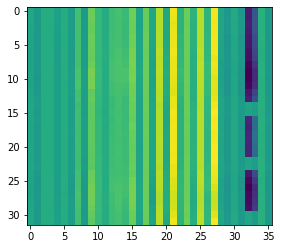

In [ ]:
# TODO:
# Each sample is a two-dimension array of (32 frames by 36 x- or y-coordinates)
#...#
sample = 0
plt.imshow(X_train[sample])


Then, run the following cell below to treat each frame as time on the x-axis, and each of the 36 numbers represented to x- or y-coordinate of the joint on the screen as individual series.  

The code to do so looks like the following:

```
sample = 0
plt.plot(X_train[sample])
```

In [ ]:
X_train[0].shape

(32, 36)

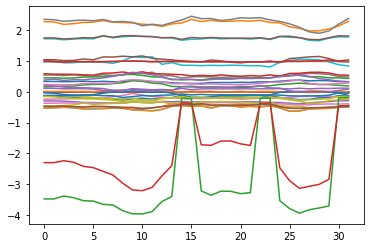

In [ ]:
# TODO:
# Plot each individual frame along the x (time) axis, and
# treat each line as a series.
#...#
sample = 0
plt.plot(X_train[sample])

Both the visualizations above provides some visual clue as to how the different joints move over time, but they are still difficult to imagine and visualize.

Update the following cell below to do a scatter plot of the X and Y coordianates of the various joints and animating them so that we can see their movements over time.

To do so, you must:

1. Set the data from your x_train to the scatter plot.

   ```
    graph_x = x_train[sample][frame][0::2]
    graph_y = x_train[sample][frame][1::2]
    line.set_data(graph_x, graph_y)
    return line,
   ```

2. Set the X- and Y-axis limits to 0-800 and 600-0 respectively this way:

    ```
    ax.set_xlim(0, 800)
    ax.set_ylim(600, 0)
    ```

3. Call the matplotlib's animation library to animate your points:

    ```
    anim = animation.FuncAnimation(fig, animate_pose, 32,  interval=50, blit=True)
    rc('animation', html='jshtml')
    anim
```

NOTE: These are the various types of actions captured in the dataset:
JUMPING, JUMPING_JACKS, BOXING, WAVING_2HANDS, WAVING_1HAND", "CLAPPING_HANDS"

In [ ]:
sample = 20000

# This function returns a set of data for every frame that is
# called from the animation.FuncAnimation below.
#
def animate_pose(frame):
    # TODO:
    # Retrieve the even number values as X-coordinates
    # and the odd number values as Y-coordinates
    #
    # Once you have these 2 sets of values, you can
    # pass them into the line.set_data to get matplotlib
    # to draw a scatter plot 
    #
    #...#
    graph_x = X_train[sample][frame][0::2]
    graph_y = X_train[sample][frame][1::2]
    line.set_data(graph_x, graph_y)
    return line,

fig, ax = plt.subplots()
plt.close()

# TODO:
# Set the x-limit and the y-limit of the animated scatter-plot chart
# Use x-limit = (0, 800), y-limit = (600, 0) for the original raw coordinates
# Use x-limit = (-4, 4), y-limit = (-3, 3) for the processed coordinates
#...#

# ax.set_xlim(0, 800)
# ax.set_ylim(600, 0)
ax.set_xlim(-4, 4)
ax.set_ylim(3, -3)


line, = ax.plot([], [], 'o', color='black');

# TODO:
# Trigger the matplotlib's animation function and pass in
# the animate_pose function above. Additionally, write the necessary
# codes to run the animation within colab.
#
# NOTE: The following codes may not work when running within Jupyter notebook
#
#...#
anim = animation.FuncAnimation(fig, animate_pose, 32,  interval=50, blit=True)
rc('animation', html='jshtml')
anim

## Section 6 - Define and Train Your Model

Try to define your Keras sequential model using any Keras layers. You should have minimally:

1. At least 1 RNN, or GRU, or LSTM Layer
2. At least 1 Dense Layer (for the softmax classification)
3. The input shape should be (32, 36)

Try to experiment and find a suitable model. You can decide if you want to use Bidirectional models, and add any Dropout layers if it helps to improve your model performance. Share your model with the class together with the validation accuracy!

A typical model can be designed this way:

```
    model.add(LSTM(128, input_shape=(32, 36)))
    model.add(Dropout(0.2))

    model.add(Dense(6, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
```

This is part of model selection and evaluation in any machine learning project. 

You may find that a good validation accuracy for you model may hover near about 85-90%. 

In [ ]:
# Create our LSTM model here
#
def create_model():

    # Use Keras to create a Sequential model here with any layers that 
    # you'd like.
    #
    model = Sequential()

    # TODO:
    # Apply your Keras knowledge and create your layers
    #
    #...#
    model.add(LSTM(128, input_shape=(32, 36)))
    model.add(Dropout(0.2))

    model.add(Dense(6, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model



# Create our model
#
model = create_model()


# Create the training folder
#
training_session_id = datetime.now().strftime("%Y-%m-%d %H-%M-%S")
training_session_folder = '/train_%s' % (training_session_id)
os.makedirs(training_session_folder, exist_ok=True)

# Configure the checkpoint and stop point.
# This allows the training to save the best models and also stop the
# training early if it detects that there are no improvements after
# a long time.
#
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath=training_session_folder + '/model.{epoch:04d}-val_acc-{val_accuracy:4.2f}-loss-{val_loss:4.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]


# Train our model
#
history = model.fit(x=X_train, y=y_train, batch_size=200, epochs=20, verbose=1, callbacks=callbacks_list, validation_data=(X_test, y_test))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 128)               84480     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 774       
Total params: 85,254
Trainable params: 85,254
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
114/114 [==============================] - 3s 12ms/step - loss: 0.6996 - accuracy: 0.7322 - val_loss: 0.3260 - val_accuracy: 0.8764
Epoch 2/20
114/114 [==============================] - 1s 7ms/step - loss: 0.2388 - accuracy: 0.9168 - val_loss: 0.2031 - val_accuracy: 0.9344
Epoch 3/20
114/114 [==============================] - 1s 7ms/step - loss: 0.1614 - accuracy: 0.

## Section 7 - Scale / Translation Normalization

So far, we have not talked about how we can normalize our skeletal keypoints so that the pose data is scale / translation invariant. This means that regardless of how far the person is from the camera, or when the person moves left or right or up or down, the coordinates of all joint positions should always be relative to a fixed frame of reference.

To take care of translation (left / right / up / down) invariance, we are shift all points together so that neck point is always placed at (0, 0). 

To take care of scale invariance, we estimate the torso height (which is either the length of the neck point to either hip, or the width of the shoulders). We then divide all joint coordinates by the torso height.

To do so, update the following the process_joints function to include code to normalize the skeleton key points as described above:

1. ref = P[1] or the midpoint of P[2], P[5]
2. reflength = length(ref to P[8]) or length(ref to P[11]) 
3. Compute 
   - P[i].x = (P[i].x - ref.x) / reflength
   - P[i].y = (P[i].y - ref.y) / reflength

```

# Declare a function that can compute length between two points
#   (x1,y1) - (x2,y2)
#
def compute_length(x1, y1, x2, y2):
    return math.sqrt((x1-x2)*(x1-x2) + (y1-y2)*(y1-y2))

# Process OpenPose's Joints
# NOTE: The "x" parameter consists of an array of consecutive x and y values 
# within the same array.
#
# x = [p0.x, p0.y, p1.x, p1.y, p2.x, p2.y, ..., p17.x, p17.y]
#     (a total of 36 values)
# 
def process_joints(x):

    r = [0] * 36

    # Initialize some values for the reference length and the reference point.
    #
    refx = 0
    refy = 0
    reflength = 1

    # Step 1: Let's find the reference point (neck)
    #
    if x[2] != 0 or x[3] != 0:         
        refx = x[2]                # use the neck X, Y
        refy = x[3]
    elif (x[4] != 0 or x[5] != 0) and (x[10] != 0 or x[11] != 0):
        refx = (x[4] + x[10]) / 2  # estimate the neck X, Y from the mid point
        refy = (x[5] + x[11]) / 2  # of the left/right shoulder
    
    # Step 2: Let's first estimate the torso length.
    #
    if x[16] != 0 and x[17] != 0:             
        reflength = compute_length(x[16], x[17], refx, refy)   # neck to right hip
    elif x[22] != 0 and x[23] != 0:
        reflength = compute_length(x[22], x[23], refx, refy)   # neck to left hip

    # Step 3:
    # Perform the translation and the scaling.
    #
    for i in range(0, 18):
        r[i*2] = (x[i*2] - refx) / reflength
        r[i*2 + 1] = (x[i*2 + 1] - refy) / reflength
    
    # Return the re-mapped and normalized result
    #
    return r
```

In [ ]:
# TODO:
# Declare a function that can compute length between two points
#   (x1,y1) - (x2,y2)
#
def compute_length(x1, y1, x2, y2):
    return math.sqrt((x1-x2)*(x1-x2) + (y1-y2)*(y1-y2))

# Process OpenPose's Joints
# NOTE: The "x" parameter consists of an array of consecutive x and y values 
# within the same array.
#
# x = [p0.x, p0.y, p1.x, p1.y, p2.x, p2.y, ..., p17.x, p17.y]
#     (a total of 36 values)
# 
def process_joints(x):

    r = [0] * 36

    # TODO:
    # Initialize some values for the reference length and the reference point.
    #
    refx = 0
    refy = 0
    reflength = 1

    # TODO:
    # Step 1: Let's find the reference point (neck)
    #
    if x[2] != 0 or x[3] != 0:         
        refx = x[2]                # use the neck X, Y
        refy = x[3]
    elif (x[4] != 0 or x[5] != 0) and (x[10] != 0 or x[11] != 0):
        refx = (x[4] + x[10]) / 2  # estimate the neck X, Y from the mid point
        refy = (x[5] + x[11]) / 2  # of the left/right shoulder
    
    # TODO:
    # Step 2: Let's first estimate the torso length.
    #
    if x[16] != 0 and x[17] != 0:             
        reflength = compute_length(x[16], x[17], refx, refy)   # neck to right hip
    elif x[22] != 0 and x[23] != 0:
        reflength = compute_length(x[22], x[23], refx, refy)   # neck to left hip

    # TODO:
    # Step 3:
    # Perform the translation and the scaling.
    #
    for i in range(0, 18):
        r[i*2] = (x[i*2] - refx) / reflength
        r[i*2 + 1] = (x[i*2 + 1] - refy) / reflength
    
    # Return the re-mapped and normalized result
    #
    return r



## Section 8 - Re-Load the Data and Re-Train Your Model Again

At this juncture, re-run the cells under the following sections again without changing the model or training parameters:

- Section 4 - Processing the Data
- Section 6 - Define and Train Your Model

See how the model's training and validation accuracy has changed after normalizating the data.

**Discuss:**

1. Why did the normalization cause a change in the training / validation performance?
2. What do you think you can do to improve performance instead of normalizating the data?
3. Other than scaling / translating the points, what other kinds of normalization can you do?
4. What are the downsides to normalizing the data?

## Section 9 - Evaluate the Training History and Performance



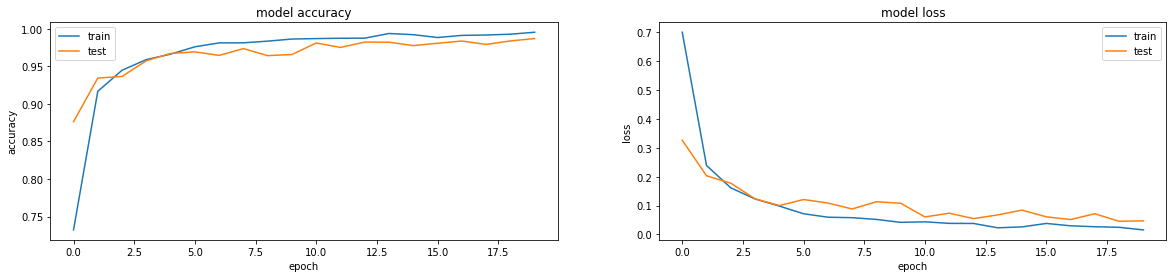

In [ ]:
#------------------------------------------------------------------------------------------

import matplotlib.pyplot as plt

# This function is used to display the history the train/test accuracy/loss
# of the Keras training.
#
#   history - Pass in the history returned from the model.fit(...) method.
#
def display_training_loss_and_accuracy(history):
    
    plt.figure(figsize=(20,4))
    
    # summarize history for accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    
    # summarize history for loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()    

display_training_loss_and_accuracy(history)




In [ ]:
labels = ["JUMPING", "JUMPING_JACKS", "BOXING", "WAVING_2HANDS", "WAVING_1HAND", "CLAPPING_HANDS"]

(22625, 32, 36)


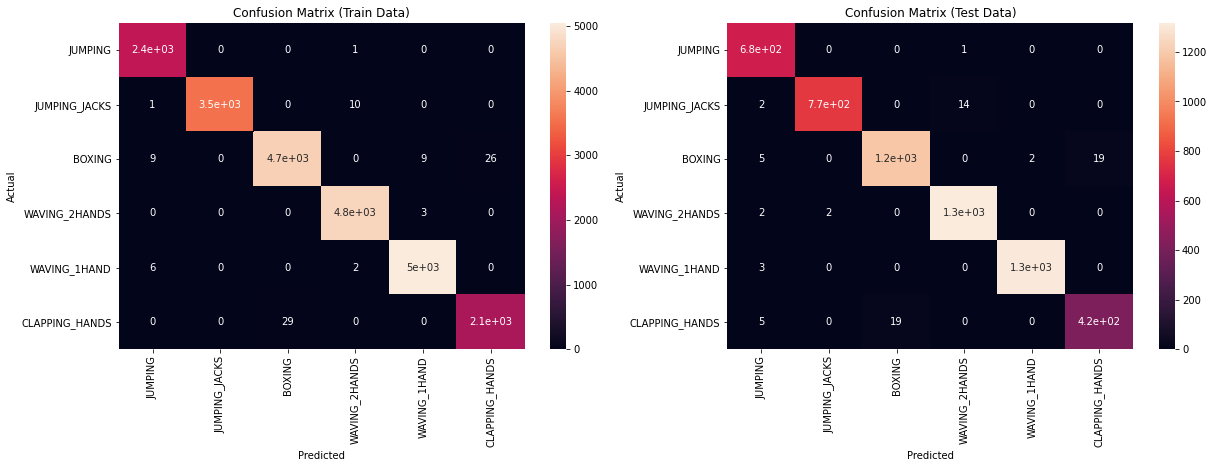

Train Data:
--------------------------------------------------------
                precision    recall  f1-score   support

       JUMPING       0.99      1.00      1.00      2400
 JUMPING_JACKS       1.00      1.00      1.00      3545
        BOXING       0.99      0.99      0.99      4724
 WAVING_2HANDS       1.00      1.00      1.00      4760
  WAVING_1HAND       1.00      1.00      1.00      5055
CLAPPING_HANDS       0.99      0.99      0.99      2141

      accuracy                           1.00     22625
     macro avg       0.99      1.00      1.00     22625
  weighted avg       1.00      1.00      1.00     22625


Test Data:
--------------------------------------------------------
                precision    recall  f1-score   support

       JUMPING       0.98      1.00      0.99       676
 JUMPING_JACKS       1.00      0.98      0.99       783
        BOXING       0.98      0.98      0.98      1216
 WAVING_2HANDS       0.99      1.00      0.99      1320
  WAVING_1HAND    

In [ ]:
#------------------------------------------------------------------------------------------

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
 
def display_classification_confusion_matrix(keras_model, x_train, y_train, x_test, y_test, labels):
    
    '''
    x_train = []
    x_test = []
    y_train = []
    y_test = []
    '''
    pred_y_train = []
    pred_y_test = []

    print (x_train.shape)
    pred_y_train = keras_model.predict(x_train)

    x_train = np.array(x_train)
    y_train = np.array(y_train)
    pred_y_train = np.array(pred_y_train)

    pred_y_test = keras_model.predict(x_test)

    x_test = np.array(x_test)
    y_test = np.array(y_test)
    pred_y_test = np.array(pred_y_test)

    #test_generator.on_epoch_end()

    plt.figure(figsize=(20,6))  

    labels = np.array(labels)

    # Convert the target labels into the categorical index
    #
    y_train_index = y_train.argmax(axis=1)
    pred_y_train_index = pred_y_train.argmax(axis=1)
    y_test_index = y_test.argmax(axis=1)
    pred_y_test_index = pred_y_test.argmax(axis=1)
    
    # Print the first Confusion Matrix for the training data
    #
    cm = confusion_matrix(y_train_index, pred_y_train_index)

    cm_df = pd.DataFrame(cm, labels, labels)          
    plt.subplot(1, 2, 1)
    plt.title('Confusion Matrix (Train Data)')
    sns.heatmap(cm_df, annot=True)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')        
    
    # Print the second Confusion Matrix for the test data
    #    
    cm = confusion_matrix(y_test_index, pred_y_test_index)
    
    cm_df = pd.DataFrame(cm, labels, labels)          
    plt.subplot(1, 2, 2)
    plt.title('Confusion Matrix (Test Data)')
    sns.heatmap(cm_df, annot=True)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')        
    
    plt.show()

    # Finally display the classification reports
    #
    print ("Train Data:")
    print ("--------------------------------------------------------")
    print(classification_report(y_train_index, pred_y_train_index, target_names=labels))
    print ("")
    print ("Test Data:")
    print ("--------------------------------------------------------")
    print(classification_report(y_test_index, pred_y_test_index, target_names=labels))
    

# Exclude the O tags from the confusion matrix.
#
display_classification_confusion_matrix(model, X_train, y_train, X_test, y_test, labels)

## Section 9 - Save and Download Model

Run the following cell to save your model. 





In [ ]:
model.save("model.savedmodel")



INFO:tensorflow:Assets written to: model.savedmodel/assets


INFO:tensorflow:Assets written to: model.savedmodel/assets


Run the following the zip the "model.savedmodel" folder into a single zip file.

Download that zip file from Colab once you are done! We will be using this for the next practical exercise.

In [ ]:
!zip model.savedmodel.zip -r model.savedmodel

  adding: model.savedmodel/ (stored 0%)
  adding: model.savedmodel/saved_model.pb (deflated 89%)
  adding: model.savedmodel/variables/ (stored 0%)
  adding: model.savedmodel/variables/variables.index (deflated 59%)
  adding: model.savedmodel/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: model.savedmodel/keras_metadata.pb (deflated 86%)
  adding: model.savedmodel/assets/ (stored 0%)


In [ ]:
model = keras.models.load_model('model.savedmodel')

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 128)               84480     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 774       
Total params: 85,254
Trainable params: 85,254
Non-trainable params: 0
_________________________________________________________________


In [ ]:
labels

['JUMPING',
 'JUMPING_JACKS',
 'BOXING',
 'WAVING_2HANDS',
 'WAVING_1HAND',
 'CLAPPING_HANDS']

In [ ]:
sample_index = 2000
sample = X_test[sample_index]
label = y_test[sample_index]


In [ ]:
sample = np.expand_dims(sample, axis=0)

In [ ]:
pred = model(sample)

In [ ]:
print('actual = {}'.format(labels[np.argmax(label)]))
print('predicted = {}'.format(labels[np.argmax(pred)]))

actual = BOXING
predicted = BOXING
